<a href="https://colab.research.google.com/github/LoneN3rd/Optimizing-Neural-Networks-The-Titanic/blob/main/%5BProject%5D_Optimizing_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=''>1. Defining the Question</font>

### a) Background Information

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

### b) Problem Statement

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, you have been tasked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). You will be required to perform feature engineering then tune your most accurate model.

### c) Metric for Success

We will use the accuracy score as a metric of success, with 80% as success.

### d) Solutin Steps

1. Load libraries and data.
2. Data cleaning.
3. Data analysis.
4. Data preparation.
5. Data modeling.
6. Summarize findings.
7. Provide recommendations.
8. Challenge the solution.

### e) Data Relevance

The data is appropriate for the research question.

# <font color=''>2. Load Libraries and Data</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# loading and previewing the train dataset
train = pd.read_csv('https://bit.ly/31azYjb')
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5,NaN,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S


In [3]:
# loading and previewing the test dataset
test = pd.read_csv('https://bit.ly/2XmmAYe ')
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S
340,1232,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.5000,NaN,S


# <font color=''>2. Data Cleaning</font>

In [4]:
# checking data types of Train
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# checking data types of Test
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# checking the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [4]:
# dropping duplicates, if any
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [8]:
# checking for missing data in Train
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# replacing missing 'Age' values with column mean and 'Embarked' with mode
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [6]:
# dropping 'Cabin' since it has too many missing values to impute
train.drop(columns = ['Cabin'], inplace = True)

In [11]:
print("Train shape:", train.shape)

Train shape: (891, 11)


In [12]:
# confirming we don't have any missing values
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# checking for missing data in Test
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# repacing missing 'Age' and 'Fare' values with their respective mean
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [8]:
# dropping 'Cabin' since it has too many missing values to impute
test.drop(columns = ['Cabin'], inplace = True)

In [16]:
# confirming we don't have any missing values
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
print("Test shape:", test.shape)

Test shape: (418, 10)


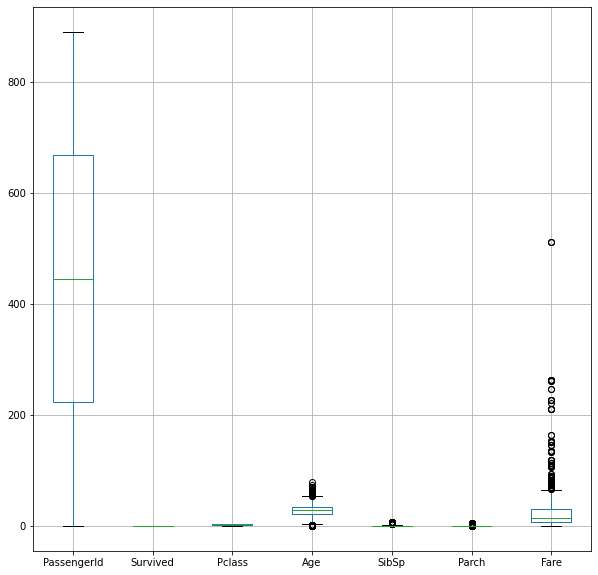

In [18]:
# visualizing the distribution of outliers - Train
plt.figure(figsize = (10, 10))
train.boxplot()
plt.show()

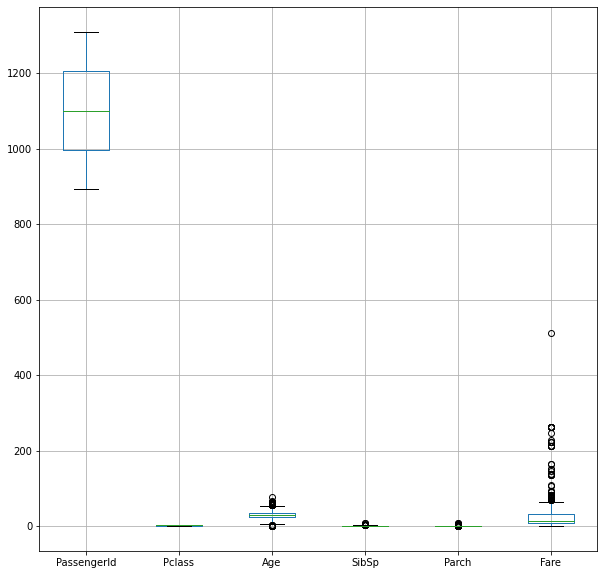

In [19]:
# visualizing the distribution of outliers - Test
plt.figure(figsize = (10, 10))
test.boxplot()
plt.show()

# <font color=''>3. Data Analysis</font>

## 3.1 Feature Engineering

### 3.1.1 Get the Title

In [9]:
# Train
# extracting the title from the name
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
train.drop(columns = ['Name'], inplace = True)

# previewing the changes
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
772,773,0,2,female,57.0,0,0,S.O./P.P. 3,10.5000,S,Mrs
833,834,0,3,male,23.0,0,0,347468,7.8542,S,Mr
149,150,0,2,male,42.0,0,0,244310,13.0000,S,Rev


In [10]:
# Test
# extracting the title from the name
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
test.drop(columns = ['Name'], inplace = True)

# previewing the changes
test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
240,1132,1,female,55.0,0,0,112377,27.7208,C,Mrs
53,945,1,female,28.0,3,2,19950,263.0000,S,Miss
125,1017,3,female,17.0,0,1,371362,16.1000,S,Miss


### 3.1.2 Get the Family Size

In [11]:
# Train
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [23]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [12]:
# Test
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr,1
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs,2
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr,1
3,895,3,male,27.0,0,0,315154,8.6625,S,Mr,1
4,896,3,female,22.0,1,1,3101298,12.2875,S,Mrs,3


### 3.1.3 Get the Fare per Person

In [13]:
# Train
# create new variable 'FarePerPerson' which is Fare / FamilySize

train['FarePerPerson'] = train['Fare'] / train['FamilySize']

In [28]:
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FarePerPerson
288,289,1,2,male,42.0,0,0,237798,13.0000,S,Mr,1,13.0000
807,808,0,3,female,18.0,0,0,347087,7.7750,S,Miss,1,7.7750
877,878,0,3,male,19.0,0,0,349212,7.8958,S,Mr,1,7.8958


In [14]:
# Test
# create new variable 'FarePerPerson' which is Fare / FamilySize

test['FarePerPerson'] = test['Fare'] / test['FamilySize']

In [28]:
test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FarePerPerson
166,1058,1,male,48.00000,0,0,PC 17591,50.4958,C,Mr,1,50.4958
41,933,1,male,30.27259,0,0,113778,26.5500,S,Mr,1,26.5500
81,973,1,male,67.00000,1,0,PC 17483,221.7792,S,Mr,2,110.8896


In [15]:
# dropping unneeded columns 'PassengerId' and 'Ticket'
train.drop(columns = ['PassengerId', 'Ticket'], inplace = True)
test.drop(columns = ['PassengerId', 'Ticket'], inplace = True)

# dropping duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

# preview the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (787, 11)
Test shape: (383, 10)


### 3.1.4 Save cleaned data plus new features to CSV

In [16]:
# saving to clean CSV files
train.to_csv('train_clean.csv', index = False)
test.to_csv('test_clean.csv', index = False)

## 3.2 Univariate Analysis 

### 3.2.1 Train dataset

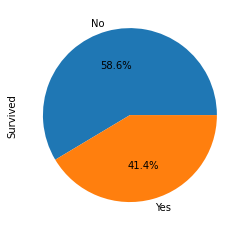

In [59]:
# distribution of those who survived vs those who didn't
plt.figure(figsize = (4, 4))
train.Survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = ["No", "Yes"])
plt.show()

A little over half of the passengers did not survive the sinking of the ship.

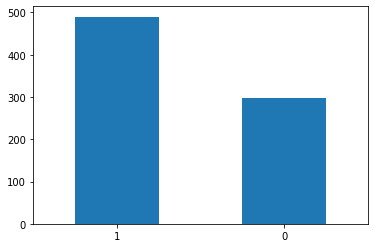

In [60]:
# distribution of gender
plt.figure(figsize = (6, 4))
train.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

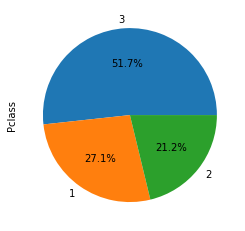

In [61]:
# distribution of class
plt.figure(figsize = (4, 4))
train.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

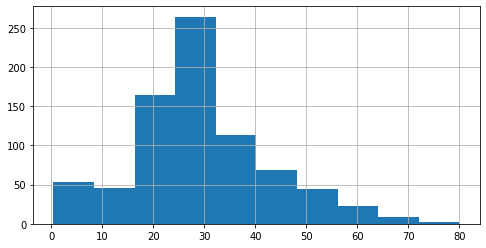

In [62]:
# distribution of age
plt.figure(figsize = (8, 4))
train.Age.hist()
plt.show()

Majority of the passengers are between 24-31 years. Minority are 55 and above.

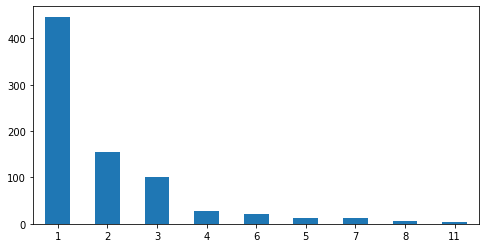

In [63]:
# distribution of family size
plt.figure(figsize = (8, 4))
train.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

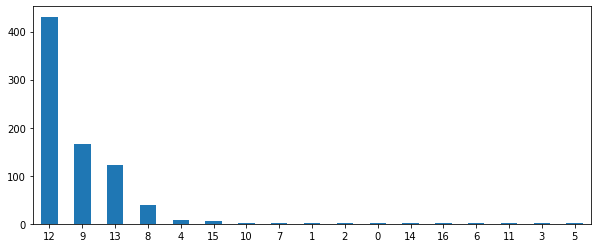

In [64]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

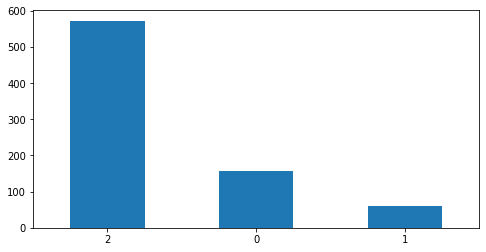

In [65]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
train.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

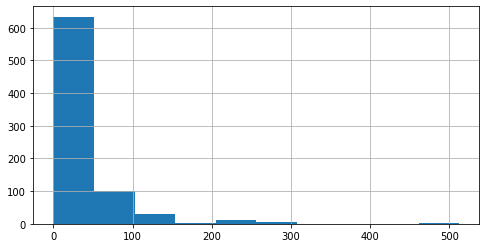

In [66]:
# distribution of fare
plt.figure(figsize = (8, 4))
train.Fare.hist()
plt.show()

Most of the fare prices are between 0-100.

### 3.2.2 Test dataset

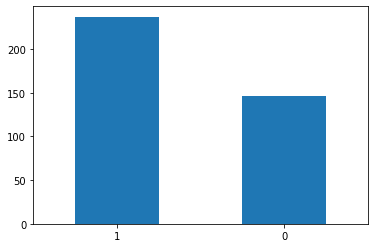

In [67]:
# distribution of gender
plt.figure(figsize = (6, 4))
test.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

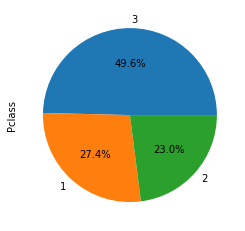

In [68]:
# distribution of class
plt.figure(figsize = (4, 4))
test.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

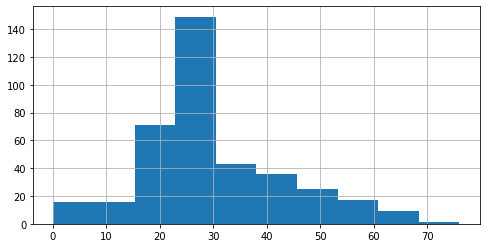

In [69]:
# distribution of age
plt.figure(figsize = (8, 4))
test.Age.hist()
plt.show()

Majority of the passengers are between 24-30 years. Minority are 69 and above.

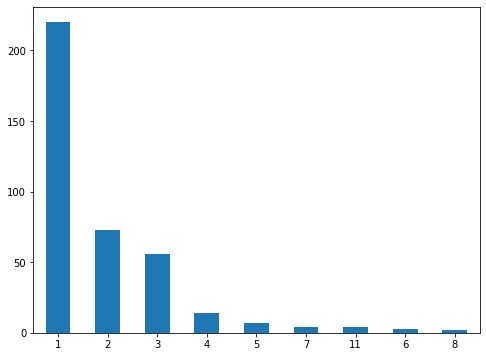

In [70]:
# distribution of family size
plt.figure(figsize = (8, 6))
test.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

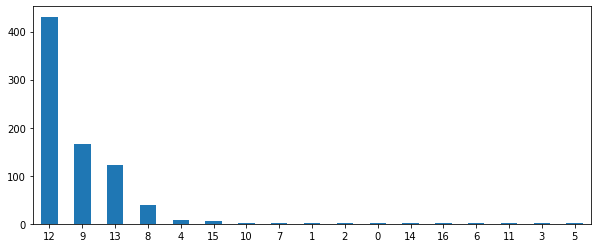

In [71]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

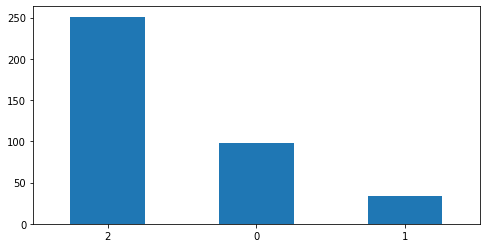

In [72]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
test.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

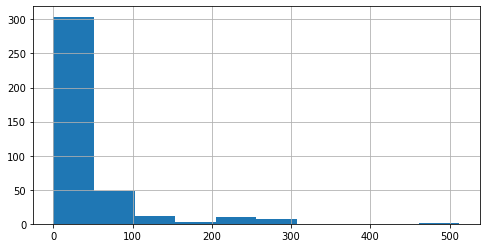

In [73]:
# distribution of fare
plt.figure(figsize = (8, 4))
test.Fare.hist()
plt.show()

Most of the prices are between 0-100.

## 3.3 Bivariate Analysis

We will look at how the other variables relate to the target variable ('Survived') in the Train dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


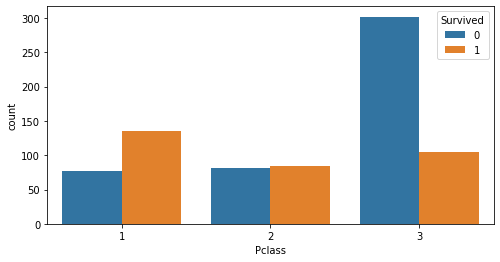

In [45]:
# distribution of Survived by class
plt.figure(figsize = (8, 4))
sns.countplot(train['Pclass'], hue = train['Survived'])
plt.show()

Majority of those who survived were in 1st class. Majority of those who died were in 3rd class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


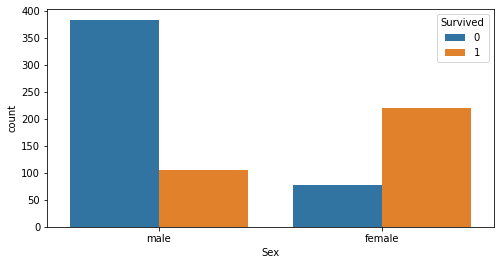

In [46]:
# distribution of Survived by gender
plt.figure(figsize = (8, 4))
sns.countplot(train['Sex'], hue = train['Survived'])
plt.show()

Majority of those who survived were female while majority of those who died were male.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


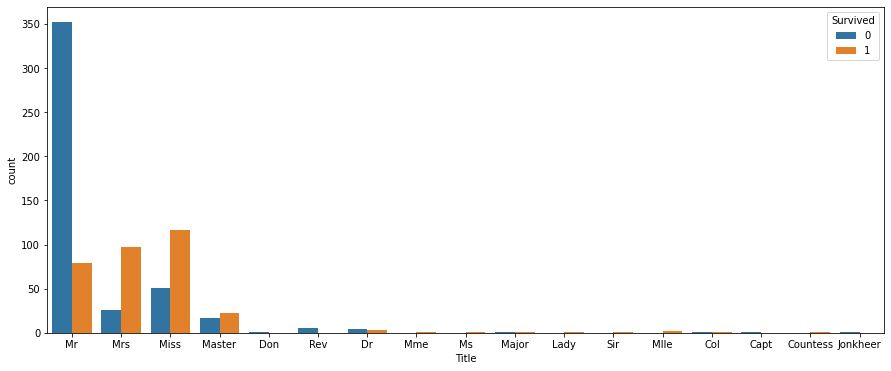

In [47]:
# distribution of Survived by title
plt.figure(figsize = (15, 6))
sns.countplot(train['Title'], hue = train['Survived'])
plt.show()

Majority of those who survived were the women, including those with superior titles like Mme, Mlle, and Countess. Majority of those who died were men, including those with superior titles like Col, Capt, and Jonkheer.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


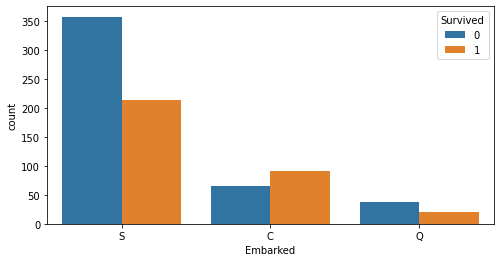

In [48]:
# distribution of Survived by point of embarkment
plt.figure(figsize = (8, 4))
sns.countplot(train['Embarked'], hue = train['Survived'])
plt.show()

Those who embarked at point S survived and died more than their counterparts who embarked at points C and Q.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


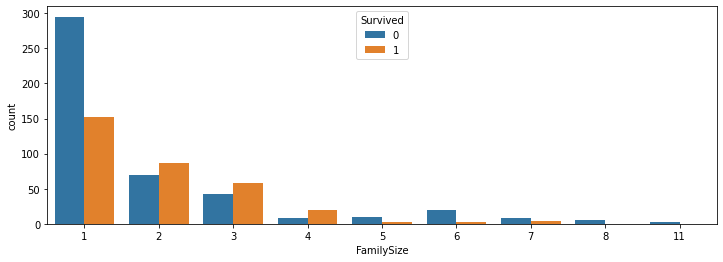

In [49]:
# distribution of Survived by family size
plt.figure(figsize = (12, 4))
sns.countplot(train['FamilySize'], hue = train['Survived'])
plt.show()

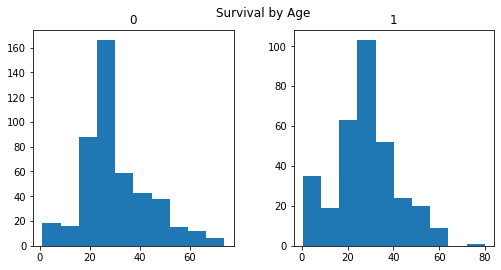

In [50]:
# survived by age
train.hist('Age', by = 'Survived', rot = 0, figsize = (8, 4))
plt.suptitle("Survival by Age")
plt.show()

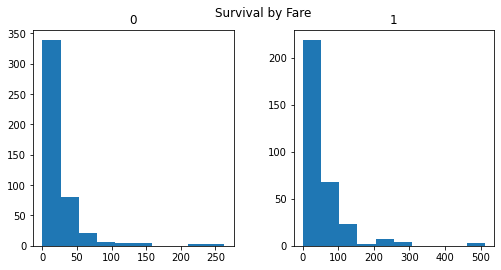

In [51]:
# survived by Fare
train.hist('Fare', by = 'Survived', rot = 0, figsize = (8, 4))
plt.suptitle("Survival by Fare")
plt.show()

## 3.4 Feature Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# encode Sex
le_sex = LabelEncoder().fit(train['Sex'].unique())
sex_classes = le_sex.classes_
train['Sex'] = le_sex.transform(train['Sex'].values)
test['Sex'] = le_sex.transform(test['Sex'].values)

In [19]:
# encode Embarked
le_embarked = LabelEncoder().fit(train['Embarked'].unique())
embarked_classes = le_embarked.classes_
train['Embarked'] = le_embarked.transform(train['Embarked'].values)
test['Embarked'] = le_embarked.transform(test['Embarked'].values)

In [20]:
# encode Title: Train
le_train_title = LabelEncoder().fit(train['Title'].unique())
train_title_classes = le_train_title.classes_
train['Title'] = le_train_title.transform(train['Title'].values)

In [21]:
# encode Title: Test
le_test_title = LabelEncoder().fit(test['Title'].unique())
test_title_classes = le_test_title.classes_
test['Title'] = le_test_title.transform(test['Title'].values)

In [22]:
# preview our modified datatypes
print("Train:")
print(train.dtypes)
print()
print("Test:")
print(test.dtypes)

Train:
Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
FarePerPerson    float64
dtype: object

Test:
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
FarePerPerson    float64
dtype: object


# <font color=''>4. Data Preparation</font>

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# splitting Train data into features (X) and label (Y)
train_properties = list(train.columns.values)
train_properties.remove('Survived')
X = train[train_properties]
Y = train['Survived']

In [25]:
# splitting into 80-20 training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# performing feature scaling on the training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit and transform X_train, transform X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("X_val shape:", train.shape)
print("y_val shape:", test.shape)

Train shape: (787, 11)
Test shape: (383, 10)
X_val shape: (787, 11)
y_val shape: (383, 10)


# <font color=''>5. Data Modeling</font>

In [26]:
# Neural networks library and modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

## 5.1 Normal Modeling

In [27]:
# ANN with one dense layer
ann_classifier_1 = Sequential() 
ann_classifier_1.add(Dense(units = 10, input_dim = 10, activation = 'relu'))
ann_classifier_1.add(Dropout(0.3, seed = 2)) 
ann_classifier_1.add(Dense(units = 1))

In [28]:
# Compile the model
ann_classifier_1.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [29]:
ann_classifier_1.fit(X_train, Y_train, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 2ms/step - loss: 0.9268 - accuracy: 0.5586
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 0.9415 - accuracy: 0.5805
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 0.7464 - accuracy: 0.5984
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.5785
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 0.7631 - accuracy: 0.5765
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.5984
Epoch 7/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.5805
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.6083
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.6262
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.6143
Epoch 11/

In [30]:
# Evaluate the model
loss, accuracy = ann_classifier_1.evaluate(X_test, Y_test)
print('Model with One Dense Layer - Accuracy:', accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.7911
Model with One Dense Layer - Accuracy: 0.7911392450332642


ANN with 2 dense layers

In [31]:
# ANN with one dense layer
ann_classifier_2 = Sequential() 
ann_classifier_2.add(Dense(units = 10, input_dim = 10, activation = 'relu'))
ann_classifier_2.add(Dropout(0.3, seed = 2))
ann_classifier_2.add(Dense(units = 10, activation = 'relu'))
ann_classifier_2.add(Dropout(0.2, seed = 2))
ann_classifier_2.add(Dense(units = 1))

# Compile the model
ann_classifier_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = ann_classifier_2.fit(X_train, Y_train, epochs=300, validation_data=(X_val, Y_val))

# Evaluate the model
loss, accuracy = ann_classifier_2.evaluate(X_test, Y_test)
print('Model with Two Dense Layers - Accuracy:', accuracy)

Epoch 1/300
16/16 [==============================] - 1s 16ms/step - loss: 4.4941 - accuracy: 0.5984 - val_loss: 7.7691 - val_accuracy: 0.4841
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 3.1923 - accuracy: 0.6044 - val_loss: 7.9877 - val_accuracy: 0.4762
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 1.7019 - accuracy: 0.6143 - val_loss: 7.9877 - val_accuracy: 0.4762
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 1.3080 - accuracy: 0.6083 - val_loss: 7.9877 - val_accuracy: 0.4762
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 1.1905 - accuracy: 0.5944 - val_loss: 7.9877 - val_accuracy: 0.4762
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 1.0067 - accuracy: 0.6004 - val_loss: 7.9877 - val_accuracy: 0.4762
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 0.8695 - accuracy: 0.6362 - val_loss: 7.9877 - val_accuracy: 0.4762
Epoch 8/300


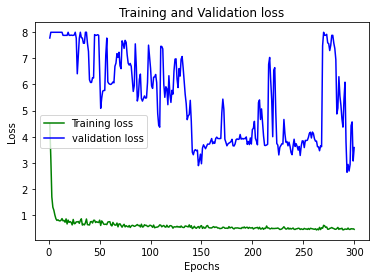

In [32]:
# Fetch train and validation loss  
loss_train = history.history['loss']
loss_val = history.history['val_loss']

# Define the no. of epochs used while training our model
epochs = range(1,301)

# Plotting
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the graph, our model tends to perform well without overfitting for no. of epochs between 150 - 220.

## 5.2 Modeling with Grid Search

For this example, we will use the Runtime type -> TPU (Tensorfolow Processing Unit). To change run type go to Menu -> Runtime -> Change runtime type -> TPU.

In [33]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [34]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

### 5.2.1 Epochs/Batch Sizes

In [35]:
# Create the ANN
def create_model():
  classifier = Sequential()
  classifier.add(Dense(units = 10, input_dim = 10, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = 'relu'))
  classifier.add(Dropout(0.2, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compile the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Return the model
  return classifier

In [36]:
# Create the KerasClassifier instance
model_epochs_batches = KerasClassifier(build_fn = create_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [37]:
# Performing grid search
epochs = [50, 150, 200, 250, 300]
batch_size = [32, 40, 48, 56, 60]
param_grid = dict(batch_size = batch_size, epochs = epochs) 
grid = GridSearchCV(estimator = model_epochs_batches, param_grid = param_grid, scoring = 'accuracy', cv = 5)
grid_result = grid.fit(X_train, Y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.7886
Epoch 202/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4233 - accuracy: 0.8184
Epoch 203/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.7960
Epoch 204/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.8184
Epoch 205/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4480 - accuracy: 0.7960
Epoch 206/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4323 - accuracy: 0.8259
Epoch 207/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7861
Epoch 208/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.8159
Epoch 209/250
7/7 [==============================] - 0s 5ms/step - loss: 0.4494 - accuracy: 0.7910
Epoch 210/250
7/7 [==============================] - 0s 4ms/step - loss:

### 5.2.2 Learning Rate 

In [38]:
def create_model_learning_rate(learning_rate=0.01):
  classifier = Sequential()
  classifier.add(Dense(units = 10, input_dim = 10, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = 'relu'))
  classifier.add(Dropout(0.2, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # We set the learning rate for our optimization algorithm 
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  # Compiling the model
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  # returning our model
  return classifier

In [40]:
# Create the KerasClassifier instance
model_with_learning_rate = KerasClassifier(build_fn=create_model_learning_rate, epochs=200, batch_size=48)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [41]:
# Performing grid search
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4] 
param_grid = dict(learning_rate = learning_rate)

grid_2 = GridSearchCV(estimator=model_with_learning_rate, param_grid=param_grid, scoring = 'accuracy')
grid_2_result = grid_2.fit(X_train, Y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_2_result.best_score_, grid_2_result.best_params_))

Streaming output truncated to the last 5000 lines.
Epoch 102/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5038 - accuracy: 0.7643
Epoch 103/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.7543
Epoch 104/200
9/9 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7643
Epoch 105/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7792
Epoch 106/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.7717
Epoch 107/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7816
Epoch 108/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.7792
Epoch 109/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7568
Epoch 110/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5260 - accuracy: 0.7469
Epoch 111/200
9/9 [==============================] - 0s 4m

### 5.2.3 Optimisation Functions

In [42]:
# Creating the ANN 
def create_model_optimisation(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(units = 10, input_dim = 10, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = 'relu'))
  classifier.add(Dropout(0.2, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compiling the model
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Returning our model
  return classifier

In [43]:
# Create the KerasClassifier instance
model_with_optimisation_functions = KerasClassifier(build_fn=create_model_optimisation, epochs=200, batch_size=48)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [44]:
# Performing grid search
optimizer = ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']
param_grid = dict(optimizer = optimizer) 
grid_3 = GridSearchCV(estimator = model_with_optimisation_functions, param_grid = param_grid, scoring = 'accuracy', cv=5)
grid_3_result = grid_3.fit(X_train, Y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_3_result.best_score_, grid_3_result.best_params_))

Streaming output truncated to the last 5000 lines.
9/9 [==============================] - 0s 5ms/step - loss: 0.4854 - accuracy: 0.7643
Epoch 102/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5070 - accuracy: 0.7543
Epoch 103/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5184 - accuracy: 0.7370
Epoch 104/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7494
Epoch 105/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5147 - accuracy: 0.7667
Epoch 106/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.7519
Epoch 107/200
9/9 [==============================] - 0s 6ms/step - loss: 0.4936 - accuracy: 0.7643
Epoch 108/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5180 - accuracy: 0.7643
Epoch 109/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4879 - accuracy: 0.7767
Epoch 110/200
9/9 [==============================] - 0s 4ms/step - loss:

### 5.2.4 Activation Functions

In [45]:
# Creating the ANN 
def create_model_activation(activation_1='relu', activation_2='relu'):
  classifier = Sequential() 
  classifier.add(Dense(units = 10, input_dim = 10, activation = activation_1))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = activation_2))
  classifier.add(Dropout(0.2, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compiling the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Returning our model
  return classifier

In [46]:
# Create the KerasClassifier instance
model_with_activation_functions = KerasClassifier(build_fn=create_model_activation, epochs=200, batch_size=48)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [47]:
# Performing grid search
from sklearn.model_selection import GridSearchCV  
activation = ['softmax', 'relu', 'tanh', 'sigmoid']
param_grid = dict(activation_1 = activation, activation_2 = activation)
grid_4 = GridSearchCV(estimator=model_with_activation_functions, param_grid=param_grid, scoring = 'accuracy')
grid_4_result = grid_4.fit(X_train, Y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_4_result.best_score_, grid_4_result.best_params_))

Streaming output truncated to the last 5000 lines.
9/9 [==============================] - 0s 4ms/step - loss: 0.5279 - accuracy: 0.7568
Epoch 102/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5628 - accuracy: 0.7146
Epoch 103/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7469
Epoch 104/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5236 - accuracy: 0.7345
Epoch 105/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.7568
Epoch 106/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.7568
Epoch 107/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5308 - accuracy: 0.7395
Epoch 108/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7494
Epoch 109/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.7320
Epoch 110/200
9/9 [==============================] - 0s 3ms/step - loss:

### 5.2.5 Optimized Model

In [54]:
# Define the ANN with optimal parameters
optimal_model = Sequential()
optimal_model.add(Dense(units = 10, input_dim = 10, activation = 'softmax'))
optimal_model.add(Dropout(0.3, seed = 2)) 
optimal_model.add(Dense(units = 10, activation = 'tanh'))
optimal_model.add(Dropout(0.2, seed = 2))
optimal_model.add(Dense(units = 1, activation = "sigmoid"))

In [55]:
# Set the learning rate for our optimized algorithm 
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [56]:
  # Compile the model
  optimal_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
# Fit the model
optimal_model.fit(X_train, Y_train, epochs = 200, batch_size = 48)

Epoch 1/200
11/11 [==============================] - 1s 4ms/step - loss: 0.6674 - accuracy: 0.5746
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.6481
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.5793 - accuracy: 0.6978
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 0.5555 - accuracy: 0.7515
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7535
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.5036 - accuracy: 0.7734
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4936 - accuracy: 0.7932
Epoch 8/200
11/11 [==============================] - 0s 5ms/step - loss: 0.4971 - accuracy: 0.7873
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7972
Epoch 10/200
11/11 [==============================] - 0s 7ms/step - loss: 0.4838 - accuracy: 0.7753
Epoch 11/

In [58]:
# Evaluate the model
loss, accuracy = optimal_model.evaluate(X_test, Y_test)
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 6ms/step - loss: 0.4003 - accuracy: 0.8165
Accuracy: 0.8164557218551636


# <font color=''>6. Summary of Findings</font>

The first ANN had an accuracy score of **79.11%**. After adding an extra dense layer, the accuracy score rose to **80.37%.** 

Optimal parameters after Grid Search were as follows: -
* batch_size: 48
* epochs: 200
* learning_rate: 0.01
* optimizer: adam
* activation function in the first dense layer: softmax
* activation function in the second dense layer: tanh

After applying the above parameters, the model's accuracy score rose to **81.64%**.

# <font color=''>7. Recommendations</font>

For optimal results, I recommend using an ANN with 2 dense layers with softmax and tanh activation functions respectively, a batch size of 48, 200 epochs, 0.01 learning rate, and adam optimizer.

# <font color=''>8. Challenging your Solution</font>

a) Did we have the right question? Yes

b) Did we have the right data? Yes

c) What can be done to improve the solution?

* Get/Invent more training data
* Handle outliers
* Early Stopping: stop learning once performance starts to degrade

